__Importing Libraries__

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

__Read Data__

In [234]:
df = pd.read_csv('housing.csv')

In [235]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [236]:
#summary stats
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


1. __My data hasan outliers,(The targetvariable)__
2. __We need convert the median_income into 10K__

array([[<AxesSubplot:title={'center':'housing_median_age'}>,
        <AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>],
       [<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>],
       [<AxesSubplot:title={'center':'median_house_value'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

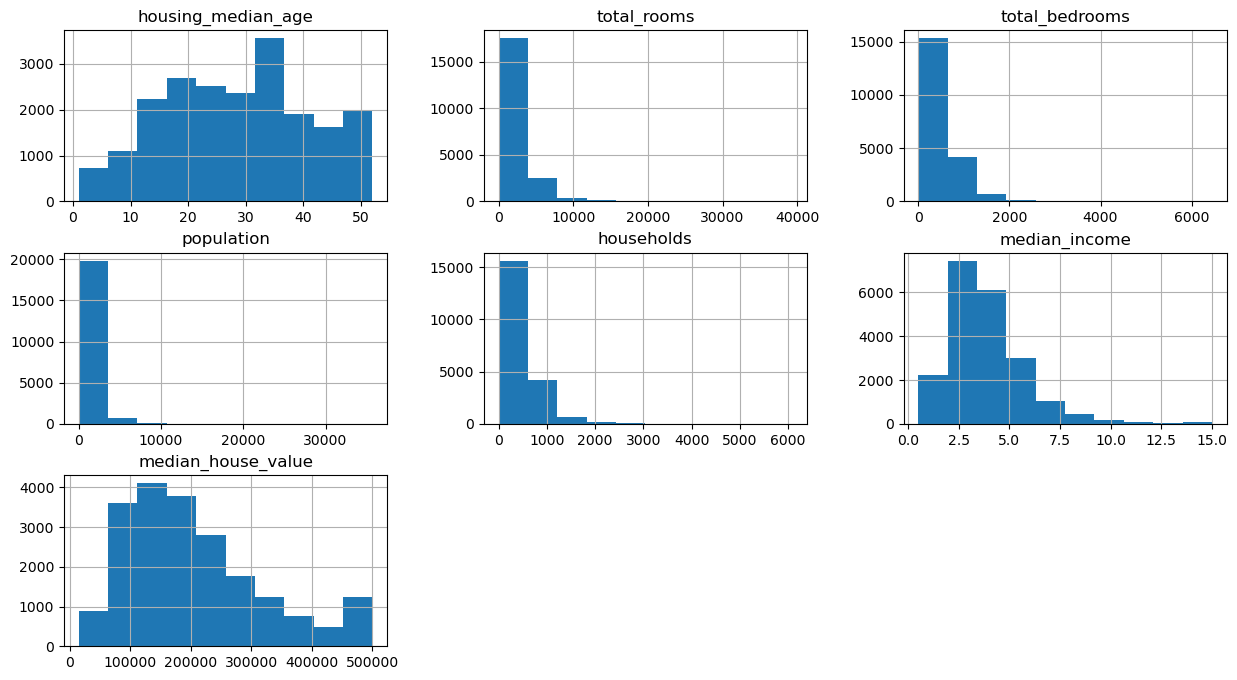

In [237]:
df.iloc[:,2:].hist(figsize = (15,8))

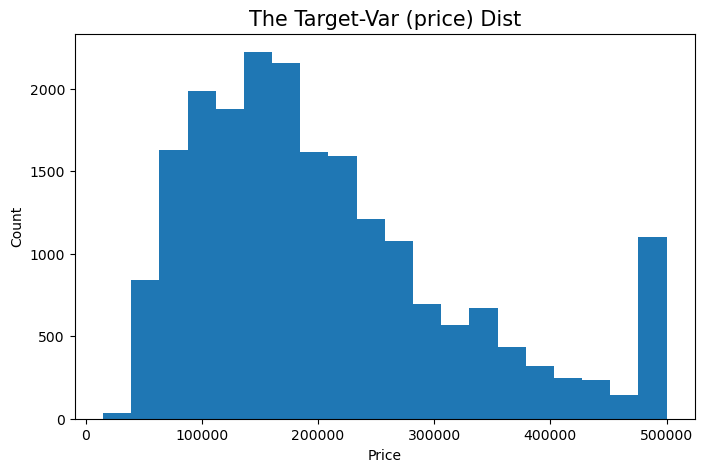

In [238]:
#plot a hist for median_house_value
plt.figure(figsize=(8,5))
plt.hist(df.median_house_value, bins = 20)
plt.title('The Target-Var (price) Dist', fontsize = 15)
plt.xlabel('Price', fontsize = 10)
plt.ylabel('Count')
plt.show()

In [239]:
#800k --> capped to 500k

In [240]:
max_price_value = df.median_house_value.max()
max_price_value

500001.0

__We will get rid of the capped prices__

In [241]:
capped_df = df[df.median_house_value == max_price_value]

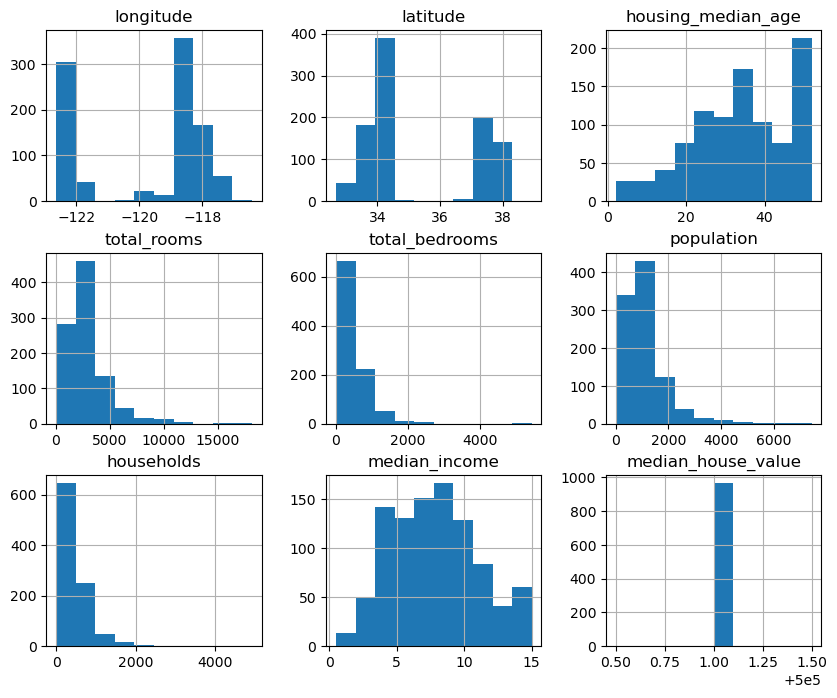

In [242]:
capped_df.hist(figsize=(10,8))
plt.show()

In [243]:
capped_df.shape[0]

965

In [244]:
965/df.shape[0]

0.04675387596899225

In [245]:
#no of capped price
df = df[df.median_house_value != max_price_value]

In [246]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


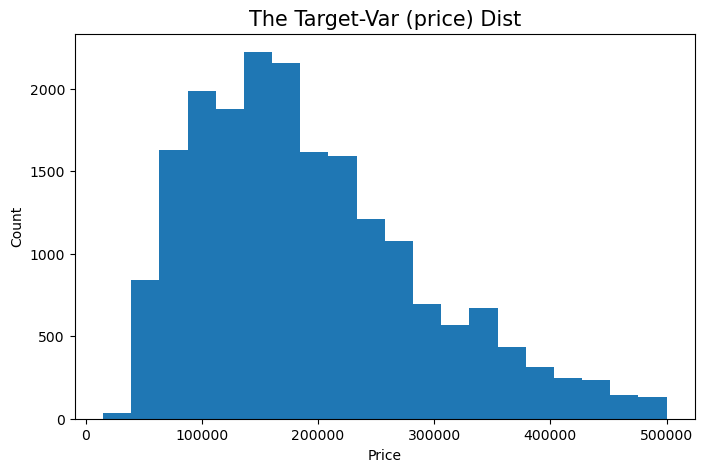

In [247]:
#plot a hist for median_house_value
plt.figure(figsize=(8,5))
plt.hist(df.median_house_value, bins = 20)
plt.title('The Target-Var (price) Dist', fontsize = 15)
plt.xlabel('Price', fontsize = 10)
plt.ylabel('Count')
plt.show()

__Split (Train, Test)__

In [305]:
from sklearn.model_selection import train_test_split

In [306]:
df.shape

(19675, 10)

In [307]:
.10 * 19675

1967.5

In [308]:
train, test = train_test_split(df, test_size =.15, random_state =5)

In [309]:
train.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1044,-120.72,38.42,17.0,5654.0,1085.0,2237.0,953.0,3.0465,144100.0,INLAND
5761,-118.29,34.18,10.0,4292.0,1075.0,2719.0,987.0,3.6974,286600.0,<1H OCEAN
3074,-119.24,35.77,28.0,1737.0,521.0,1764.0,514.0,1.7813,67800.0,INLAND
19585,-120.69,37.59,27.0,1170.0,227.0,660.0,222.0,2.3906,81800.0,INLAND
2943,-118.97,35.36,31.0,1418.0,306.0,1219.0,312.0,1.5743,46700.0,INLAND


In [310]:
test.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4205,-118.25,34.11,43.0,2230.0,583.0,1667.0,543.0,2.8667,217800.0,<1H OCEAN
13274,-117.62,34.11,31.0,2561.0,414.0,1204.0,435.0,4.4637,192800.0,INLAND
1516,-122.07,37.93,45.0,1544.0,244.0,614.0,238.0,5.0255,226000.0,NEAR BAY
20107,-120.32,37.91,16.0,108.0,18.0,54.0,22.0,4.3750,100000.0,INLAND
6186,-117.90,34.10,31.0,3007.0,653.0,1766.0,616.0,3.7083,166000.0,<1H OCEAN


__EDA__

In [311]:
train.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.923494,-0.102506,0.049177,0.074090,0.104659,0.060568,-0.005148,-0.043397
latitude,-0.923494,1.000000,0.006215,-0.038299,-0.071431,-0.117721,-0.077827,-0.082624,-0.151139
housing_median_age,-0.102506,0.006215,1.000000,-0.372766,-0.324823,-0.292141,-0.306701,-0.196568,0.064668
total_rooms,0.049177,-0.038299,-0.372766,1.000000,0.932352,0.857489,0.920081,0.224511,0.144266
total_bedrooms,0.074090,-0.071431,-0.324823,0.932352,1.000000,0.876244,0.978820,0.018968,0.071928
population,0.104659,-0.117721,-0.292141,0.857489,0.876244,1.000000,0.907212,0.043686,0.012545
households,0.060568,-0.077827,-0.306701,0.920081,0.978820,0.907212,1.000000,0.044456,0.093118
median_income,-0.005148,-0.082624,-0.196568,0.224511,0.018968,0.043686,0.044456,1.000000,0.645236
median_house_value,-0.043397,-0.151139,0.064668,0.144266,0.071928,0.012545,0.093118,0.645236,1.000000


<AxesSubplot:>

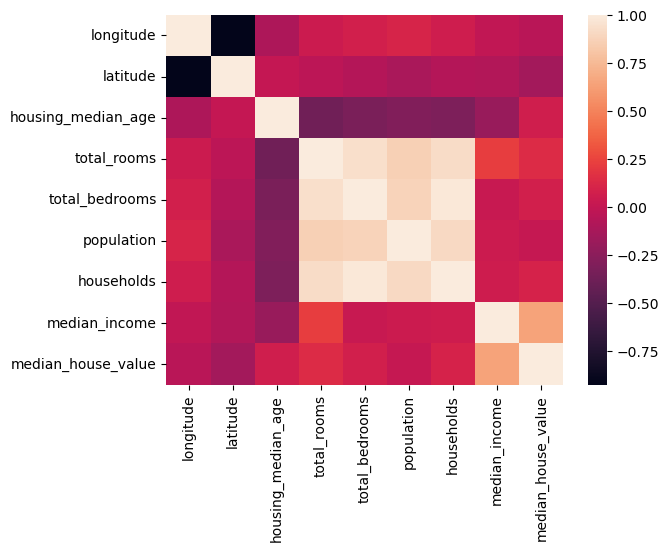

In [312]:
sns.heatmap(df.corr())

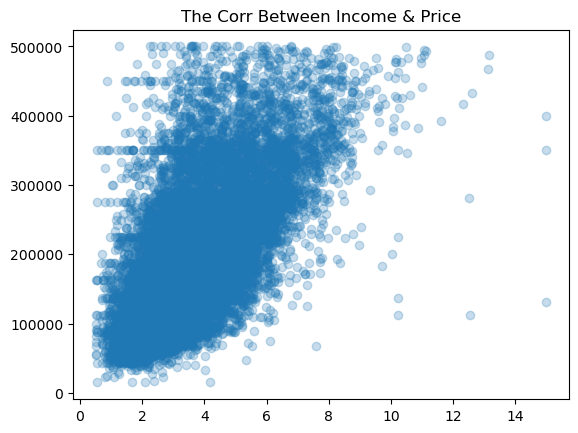

In [313]:
# scattered plot between priceand income
plt.scatter(train.median_income, train.median_house_value, alpha=.25)
plt.title('The Corr Between Income & Price')
plt.show()

C:\Users\HP840 G3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


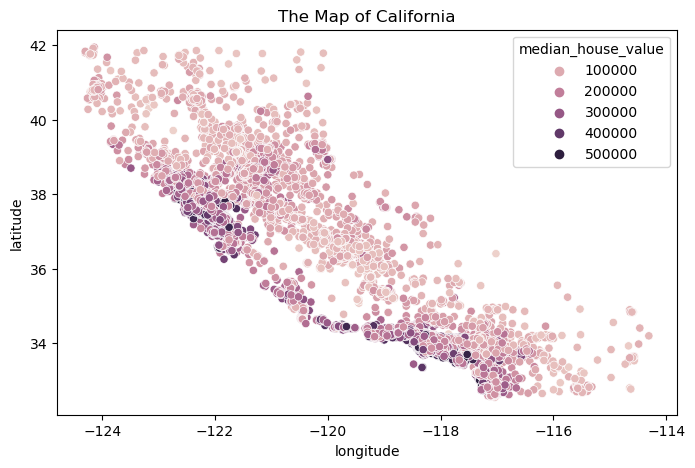

In [314]:
# map
plt.figure(figsize=(8,5))
sns.scatterplot(train.longitude, train.latitude, hue = train.median_house_value)
plt.title('The Map of California', fontsize=12)
plt.show()

__Clean__

In [315]:
#Check for null values
train.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        171
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

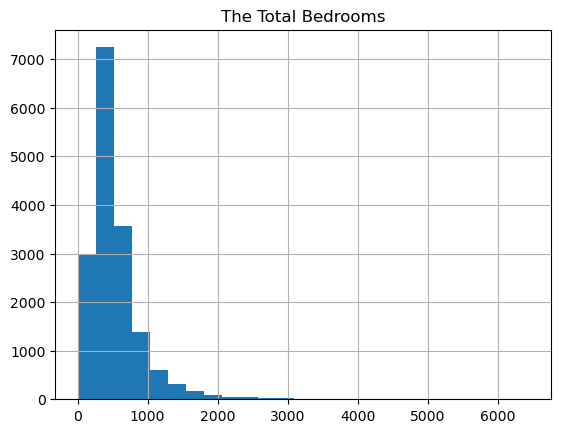

In [316]:
train.total_bedrooms.hist(bins=25)
plt.title('The Total Bedrooms')
plt.show()

In [317]:
#Median of rooms
totalbed_median = train.total_bedrooms.median()

In [318]:
totalbed_median

436.0

In [319]:
train.total_bedrooms.fillna(totalbed_median, inplace = True)

In [320]:
# Checking for duplicates
train.duplicated().sum()

0

__Feature Engineering__

In [321]:
train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [322]:
train.corr()['median_house_value']

longitude            -0.043397
latitude             -0.151139
housing_median_age    0.064668
total_rooms           0.144266
total_bedrooms        0.071349
population            0.012545
households            0.093118
median_income         0.645236
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [323]:
# Population by total_rooms
train['pop_room_ratio'] = train.population / train.total_rooms

In [324]:
train.corr()['median_house_value']

longitude            -0.043397
latitude             -0.151139
housing_median_age    0.064668
total_rooms           0.144266
total_bedrooms        0.071349
population            0.012545
households            0.093118
median_income         0.645236
median_house_value    1.000000
pop_room_ratio       -0.027452
Name: median_house_value, dtype: float64

In [325]:
# total_bedrooms by total_rooms
train['bedroom_total_ratio']= train.total_bedrooms / train.total_rooms

In [326]:
train.corr()['median_house_value']

longitude             -0.043397
latitude              -0.151139
housing_median_age     0.064668
total_rooms            0.144266
total_bedrooms         0.071349
population             0.012545
households             0.093118
median_income          0.645236
median_house_value     1.000000
pop_room_ratio        -0.027452
bedroom_total_ratio   -0.201101
Name: median_house_value, dtype: float64

In [327]:
train.drop(columns='pop_room_ratio', inplace=True)

In [328]:
# no of members per family
train['members_per_family'] = train.population/train.households

In [329]:
train.corr()['median_house_value']

longitude             -0.043397
latitude              -0.151139
housing_median_age     0.064668
total_rooms            0.144266
total_bedrooms         0.071349
population             0.012545
households             0.093118
median_income          0.645236
median_house_value     1.000000
bedroom_total_ratio   -0.201101
members_per_family    -0.019750
Name: median_house_value, dtype: float64

In [330]:
train.drop(columns='members_per_family', inplace=True)

__Categorical Data__

In [331]:
train.ocean_proximity.unique()

array(['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)

In [348]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [349]:
# label (ordinal) encoding
ordinal_encoder = LabelEncoder()

In [350]:
ocean_labels = ordinal_encoder.fit_transform(train.ocean_proximity)
pd.Series(ocean_labels)

0        0
1        0
2        0
3        1
4        1
        ..
16718    1
16719    0
16720    1
16721    1
16722    1
Length: 16723, dtype: int32

In [354]:
# one hotencoding
Ocean_encoder = OneHotEncoder()

In [355]:
# 2d form of ocean pproximity
ocean_proximity = train.ocean_proximity.values.reshape(-1,1)

In [356]:
ocean_proximity = ocean_encoder.fit_transform(ocean_proximity).toarray()

NameError: name 'ocean_encoder' is not defined

In [357]:
ocean_proximity

array([['<1H OCEAN'],
       ['<1H OCEAN'],
       ['<1H OCEAN'],
       ...,
       ['INLAND'],
       ['INLAND'],
       ['INLAND']], dtype=object)

In [358]:
train.ocean_proximity.unique()

array(['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)

In [359]:
train.ocean_proximity

3991     <1H OCEAN
11043    <1H OCEAN
6866     <1H OCEAN
2251        INLAND
13381       INLAND
           ...    
1044        INLAND
5761     <1H OCEAN
3074        INLAND
19585       INLAND
2943        INLAND
Name: ocean_proximity, Length: 16723, dtype: object

In [360]:
classes = ocean_encoder.categories_[0]
classes

NameError: name 'ocean_encoder' is not defined

In [346]:
ocean_proximity

array([['<1H OCEAN'],
       ['<1H OCEAN'],
       ['<1H OCEAN'],
       ...,
       ['INLAND'],
       ['INLAND'],
       ['INLAND']], dtype=object)

In [347]:
#add the matrix to the train df
train[classes] = ocean_proximity

NameError: name 'classes' is not defined

In [344]:
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedroom_total_ratio
3991,-118.63,34.17,33.0,4769.0,787.0,2019.0,743.0,5.5798,338200.0,<1H OCEAN,0.165024
11043,-117.83,33.82,26.0,3259.0,456.0,1354.0,459.0,5.7817,267600.0,<1H OCEAN,0.139920
6866,-118.12,34.06,25.0,1137.0,293.0,800.0,281.0,2.4286,233300.0,<1H OCEAN,0.257696
2251,-119.81,36.80,38.0,2252.0,325.0,777.0,314.0,6.1575,160100.0,INLAND,0.144316
13381,-117.61,34.12,17.0,6709.0,1198.0,3954.0,1161.0,4.6997,156900.0,INLAND,0.178566
...,...,...,...,...,...,...,...,...,...,...,...
1044,-120.72,38.42,17.0,5654.0,1085.0,2237.0,953.0,3.0465,144100.0,INLAND,0.191900
5761,-118.29,34.18,10.0,4292.0,1075.0,2719.0,987.0,3.6974,286600.0,<1H OCEAN,0.250466
3074,-119.24,35.77,28.0,1737.0,521.0,1764.0,514.0,1.7813,67800.0,INLAND,0.299942
19585,-120.69,37.59,27.0,1170.0,227.0,660.0,222.0,2.3906,81800.0,INLAND,0.194017


In [ ]:
train.drop(columns = 'ocean_proximity', inplace = True)

1. Filled NaN by the median_totalbedrooms
2. Added the bedrooms_total_ratio column
3. Onehot encoding

In [ ]:
train

In [281]:
train, valid =train_test_split(train, test_size=.1, random_state=5)

In [282]:
valid

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedroom_total_ratio
11881,-117.41,33.97,24.0,950.0,183.0,383.0,182.0,3.0694,125000.0,INLAND,0.192632
15177,-117.07,33.04,4.0,2271.0,578.0,926.0,391.0,3.6437,210100.0,<1H OCEAN,0.254513
5482,-118.46,33.99,41.0,885.0,285.0,562.0,268.0,3.1992,303800.0,<1H OCEAN,0.322034
11178,-117.96,33.83,29.0,1194.0,176.0,474.0,170.0,6.1001,298900.0,<1H OCEAN,0.147404
15490,-117.19,33.14,12.0,3652.0,923.0,1677.0,728.0,2.3267,92000.0,<1H OCEAN,0.252738
...,...,...,...,...,...,...,...,...,...,...,...
16179,-121.28,37.96,28.0,1942.0,724.0,1618.0,638.0,0.9365,52500.0,INLAND,0.372812
1771,-122.35,37.95,42.0,1485.0,290.0,971.0,303.0,3.6094,114600.0,NEAR BAY,0.195286
5115,-118.30,33.96,39.0,2802.0,618.0,1524.0,529.0,2.6518,136300.0,<1H OCEAN,0.220557
8966,-118.40,34.00,34.0,1816.0,335.0,872.0,339.0,4.8500,329400.0,<1H OCEAN,0.184471


In [283]:
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedroom_total_ratio
12516,-121.47,38.56,52.0,889.0,162.0,273.0,145.0,3.1250,85600.0,INLAND,0.182227
3476,-118.52,34.32,18.0,7498.0,976.0,3189.0,955.0,8.1248,374000.0,<1H OCEAN,0.130168
11493,-117.99,33.69,12.0,2480.0,858.0,1441.0,788.0,1.6705,350000.0,<1H OCEAN,0.345968
18233,-122.09,37.40,26.0,3218.0,1021.0,2087.0,964.0,3.2875,182700.0,NEAR BAY,0.317278
14796,-117.10,32.58,27.0,2616.0,591.0,1889.0,577.0,2.3824,127600.0,NEAR OCEAN,0.225917
...,...,...,...,...,...,...,...,...,...,...,...
2327,-119.71,36.81,19.0,1648.0,368.0,557.0,354.0,1.7969,72800.0,INLAND,0.223301
2530,-122.20,39.52,39.0,2551.0,482.0,1181.0,437.0,2.0625,63400.0,INLAND,0.188946
2831,-119.01,35.39,29.0,1820.0,459.0,1134.0,419.0,1.8289,59400.0,INLAND,0.252198
4329,-118.31,34.08,30.0,1390.0,457.0,1460.0,423.0,2.2422,254500.0,<1H OCEAN,0.328777


In [284]:
train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'bedroom_total_ratio'],
      dtype='object')

In [285]:
train.drop(columns='median_house_value')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,bedroom_total_ratio
12516,-121.47,38.56,52.0,889.0,162.0,273.0,145.0,3.1250,INLAND,0.182227
3476,-118.52,34.32,18.0,7498.0,976.0,3189.0,955.0,8.1248,<1H OCEAN,0.130168
11493,-117.99,33.69,12.0,2480.0,858.0,1441.0,788.0,1.6705,<1H OCEAN,0.345968
18233,-122.09,37.40,26.0,3218.0,1021.0,2087.0,964.0,3.2875,NEAR BAY,0.317278
14796,-117.10,32.58,27.0,2616.0,591.0,1889.0,577.0,2.3824,NEAR OCEAN,0.225917
...,...,...,...,...,...,...,...,...,...,...
2327,-119.71,36.81,19.0,1648.0,368.0,557.0,354.0,1.7969,INLAND,0.223301
2530,-122.20,39.52,39.0,2551.0,482.0,1181.0,437.0,2.0625,INLAND,0.188946
2831,-119.01,35.39,29.0,1820.0,459.0,1134.0,419.0,1.8289,INLAND,0.252198
4329,-118.31,34.08,30.0,1390.0,457.0,1460.0,423.0,2.2422,<1H OCEAN,0.328777


In [286]:
X_train = train.drop(columns='median_house_value')
y_train = train.median_house_value

In [287]:
X_valid = valid.drop(columns='median_house_value')
Y_valid = valid.median_house_value

__Modeling__

In [301]:
from sklearn.linear_model import LinearRegression

In [302]:
model = LinearRegression()

In [303]:
# train
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'INLAND'

In [304]:
model.score(X_valid, Y_valid)

ValueError: could not convert string to float: 'INLAND'

In [291]:
from sklearn.ensemble import RandomForestRegressor

In [292]:
model = RandomForestRegressor()

In [293]:
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'INLAND'

In [ ]:
model.score(X_valid, Y_valid)

### Test

In [294]:
test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5877,-118.35,34.16,42.0,2267.0,478.0,1083.0,458.0,3.2015,250000.0,<1H OCEAN
135,-122.20,37.83,26.0,1589.0,223.0,542.0,211.0,8.4010,351200.0,NEAR BAY
16112,-122.50,37.74,44.0,2527.0,518.0,1434.0,444.0,3.8750,275700.0,NEAR OCEAN
16564,-121.52,37.75,18.0,1544.0,272.0,825.0,286.0,4.3229,327300.0,INLAND
10496,-117.66,33.50,16.0,1956.0,346.0,862.0,326.0,4.4732,186300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
4205,-118.25,34.11,43.0,2230.0,583.0,1667.0,543.0,2.8667,217800.0,<1H OCEAN
13274,-117.62,34.11,31.0,2561.0,414.0,1204.0,435.0,4.4637,192800.0,INLAND
1516,-122.07,37.93,45.0,1544.0,244.0,614.0,238.0,5.0255,226000.0,NEAR BAY
20107,-120.32,37.91,16.0,108.0,18.0,54.0,22.0,4.3750,100000.0,INLAND


In [295]:
test.total_bedrooms.isna().sum()

29

In [296]:
test.total_bedrooms.fillna(totalbed_median, inplace = True)

In [297]:
test.total_bedrooms.isna().sum()

0

In [298]:
test.total_bedrooms.duplicated().sum()

1876